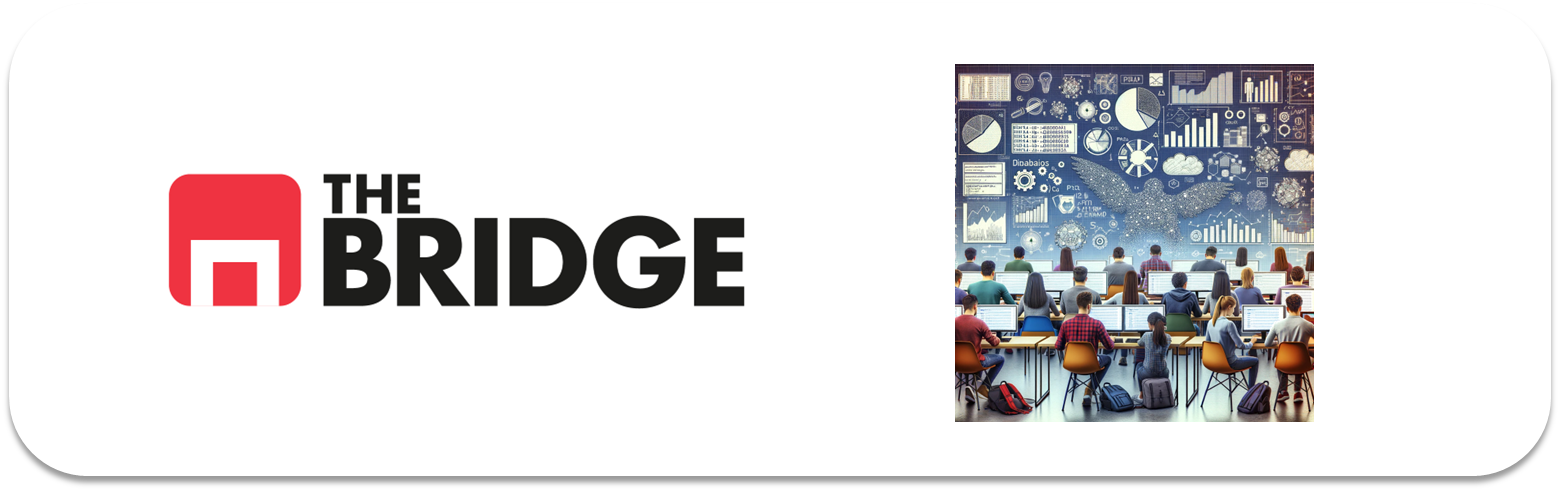

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Machine Learning - Models
from sklearn.linear_model import LogisticRegression

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [9]:
# 1

df = pd.read_csv('./data/titanic.csv')
df_work = df.copy()
# Visualizar las primeras filas
print("Primeras 5 filas del dataset:")
display(df.head())

# Información general de las columnas y tipos de datos
print("\nResumen del dataset:")
df.info()

Primeras 5 filas del dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



Resumen del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [3]:
# 2
# columnas a eliminar
cols_to_drop = ['class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

# Aplicamos la limpieza
df_cleaned = df.drop(columns=cols_to_drop)

# Eliminamos filas con nulos (fundamental para Age y Embarked ya que no imputamos)
df_cleaned = df_cleaned.dropna()

# Verificamos cómo ha quedado
print(f"Filas originales: {len(df)}")
print(f"Filas tras dropna: {len(df_cleaned)}")
print("\nColumnas restantes para el modelo:")
print(df_cleaned.columns.tolist())

Filas originales: 891
Filas tras dropna: 712

Columnas restantes para el modelo:
['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']


C:\Users\ivanm\AppData\Local\Temp\ipykernel_18052\2399600138.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='survived', data=df_cleaned, palette='viridis')


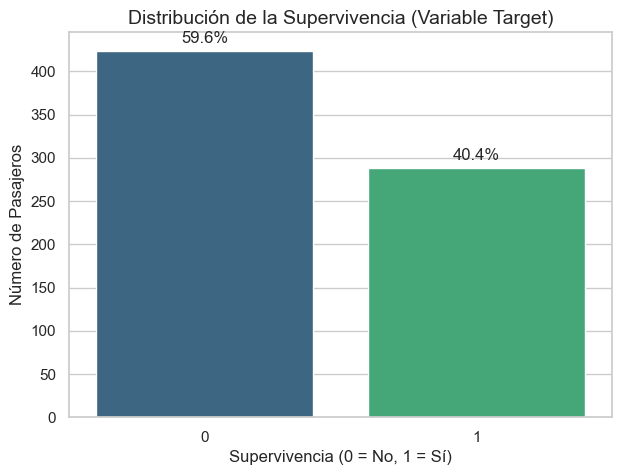

Frecuencia absoluta:
survived
0    424
1    288
Name: count, dtype: int64


In [4]:
# Configuración visual
sns.set_theme(style="whitegrid")
plt.figure(figsize=(7, 5))

# Gráfico de barras (count plot)
ax = sns.countplot(x='survived', data=df_cleaned, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Distribución de la Supervivencia (Variable Target)', fontsize=14)
plt.xlabel('Supervivencia (0 = No, 1 = Sí)', fontsize=12)
plt.ylabel('Número de Pasajeros', fontsize=12)

# Añadir etiquetas de porcentaje sobre las barras
total = len(df_cleaned)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

# Frecuencia exacta
print("Frecuencia absoluta:")
print(df_cleaned['survived'].value_counts())

### 3. Análisis de la Variable Target: `survived`

#### Análisis Gráfico
Se observa una distribución donde aproximadamente el **60%** de los pasajeros no sobrevivieron (0), mientras que el **40%** restante sí lo hizo (1). 

#### Razonamiento sobre el impacto en los resultados
La distribución observada tiene varias implicaciones críticas para el entrenamiento del modelo de Regresión Logística:

* **Desequilibrio de Clases Moderado**: Existe un desequilibrio notable pero no extremo entre las clases. El modelo dispondrá de más ejemplos de la clase mayoritaria (fallecidos), lo que podría inclinar su aprendizaje hacia los patrones que definen la no supervivencia.
* **Sesgo del Accuracy (Exactitud)**: Dado que las clases no son 50/50, la métrica de *Accuracy* no será suficiente para evaluar el éxito. Un modelo "perezoso" que prediga siempre la muerte del pasajero obtendría un 60% de acierto inicial; por ello, es imperativo analizar la **Matriz de Confusión** y el **F1-Score** para validar el rendimiento real en ambas clases.
* **Frontera de Decisión**: La Regresión Logística busca separar las clases mediante una sigmoide. Al haber más datos de fallecidos, la frontera de decisión podría desplazarse, aumentando potencialmente el riesgo de obtener **Falsos Negativos** (predecir que alguien no sobrevive cuando en realidad sí lo hizo).
* **Conclusión**: El dataset es apto para el modelado, pero requiere que prestemos especial atención a la capacidad del modelo para identificar correctamente la clase minoritaria (supervivientes).

In [5]:
# 4
X = df_cleaned.drop(columns=['survived'])
y = df_cleaned['survived']

# 2. Realizamos el split
# Usamos un 20% para test y un 80% para train (0.2)
# stratify=df_cleaned['embarked'] asegura el reparto similar por ciudad de embarque
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=df_cleaned['embarked'] 
)

# 3. Verificación de la estratificación
print("Proporción de ciudades en Train:")
print(X_train['embarked'].value_counts(normalize=True))

print("\nProporción de ciudades en Test:")
print(X_test['embarked'].value_counts(normalize=True))

Proporción de ciudades en Train:
embarked
S    0.778559
C    0.182777
Q    0.038664
Name: proportion, dtype: float64

Proporción de ciudades en Test:
embarked
S    0.776224
C    0.181818
Q    0.041958
Name: proportion, dtype: float64


In [6]:
# 5
# Transformamos 'sex' y 'embarked' en columnas numéricas (0 y 1)
X_encoded = pd.get_dummies(X, columns=['sex', 'embarked'], drop_first=True)

# 2. Construcción de las parejas finales X, y
# Aplicamos el split sobre los datos ya codificados
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=X['embarked'] # Mantenemos la estratificación por la ciudad de embarque original
)

# 3. Verificación de las parejas
print("Dimensiones de las parejas construidas:")
print(f"X_train: {X_train.shape} | y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}  | y_test:  {y_test.shape}")

print("\nPrimeras filas de X_train (ya listo para el modelo):")
display(X_train.head())

Dimensiones de las parejas construidas:
X_train: (569, 8) | y_train: (569,)
X_test:  (143, 8)  | y_test:  (143,)

Primeras filas de X_train (ya listo para el modelo):


,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
391,3,21.0,0,0,7.7958,True,False,True
519,3,32.0,0,0,7.8958,True,False,True
211,2,35.0,0,0,21.0000,False,False,True
208,3,16.0,0,0,7.7500,False,True,False
794,3,25.0,0,0,7.8958,True,False,True


In [ ]:
# 6

df = df.dropna(subset=['embarked'])

# Selección de columnas originales (sin dummies aún)
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X = df[features]
y = df['survived']

# Split Estratificado
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=X['embarked']
)

#Calculamos media y moda SOLO en train para evitar leakage
media_edad_train = X_train['age'].mean()
moda_embarked_train = X_train['embarked'].mode()[0]

# Aplicamos los valores de train a ambos conjuntos (Train y Test)
X_train['age'] = X_train['age'].fillna(media_edad_train)
X_test['age'] = X_test['age'].fillna(media_edad_train)

X_train['embarked'] = X_train['embarked'].fillna(moda_embarked_train)
X_test['embarked'] = X_test['embarked'].fillna(moda_embarked_train)

X_train = pd.get_dummies(X_train, columns=['sex', 'embarked'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['sex', 'embarked'], drop_first=True)

print(f"Imputación completada:")
print(f"- Media de edad aplicada: {media_edad_train:.2f}")
print(f"- Moda de embarque aplicada: {moda_embarked_train}")
display(X_train.head())


Imputación completada:
- Media de edad aplicada: 29.71
- Moda de embarque aplicada: S


,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
46,3,29.710454,1,0,15.500,True,True,False
230,1,35.000000,1,0,83.475,False,False,True
657,3,32.000000,1,1,15.500,False,True,False
888,3,29.710454,1,2,23.450,False,False,True
809,1,33.000000,1,0,53.100,False,False,True


C:\Users\ivanm\AppData\Local\Temp\ipykernel_18052\7008436.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pclass', y='survived', data=df, ax=axes[0], palette='magma')
C:\Users\ivanm\AppData\Local\Temp\ipykernel_18052\7008436.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='survived', data=df, ax=axes[1], palette='viridis')


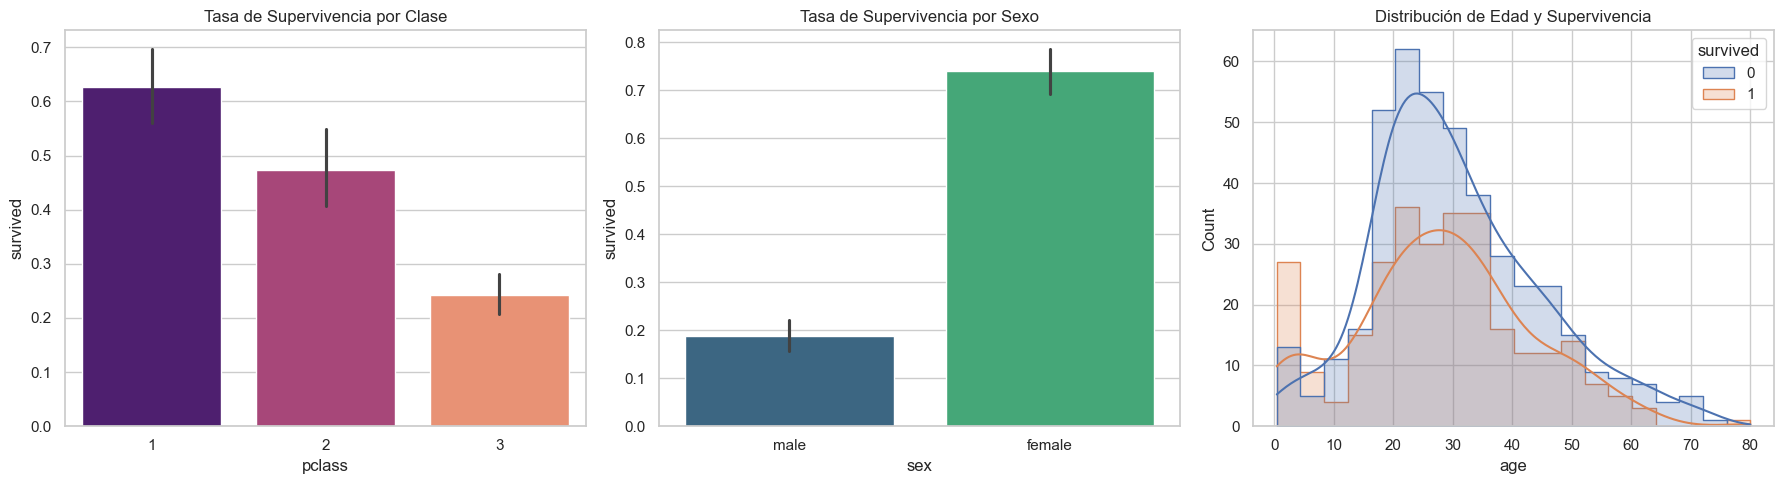

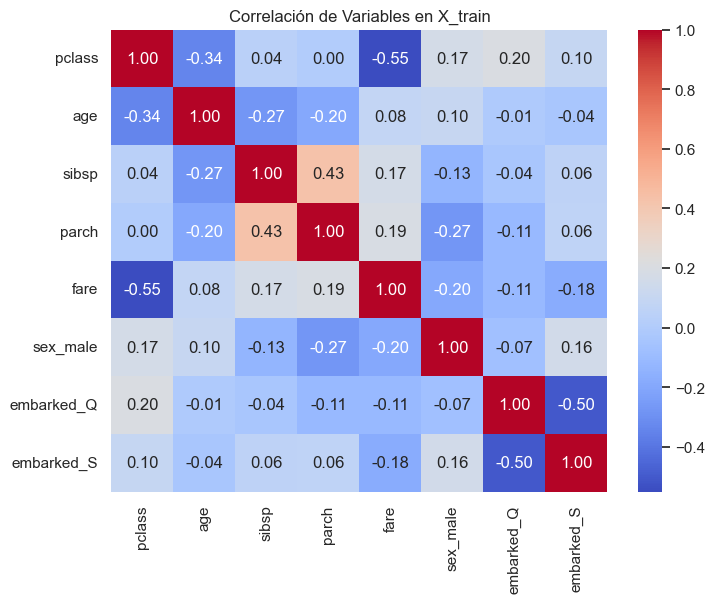

In [ ]:
#7

# Configuramos la figura
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# A. Supervivencia por Clase (Pclass)
sns.barplot(x='pclass', y='survived', data=df, ax=axes[0], palette='magma')
axes[0].set_title('Tasa de Supervivencia por Clase')

# B. Supervivencia por Sexo
sns.barplot(x='sex', y='survived', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Tasa de Supervivencia por Sexo')

# C. Distribución de Edad por Supervivencia
sns.histplot(data=df, x='age', hue='survived', kde=True, ax=axes[2], element="step")
axes[2].set_title('Distribución de Edad y Supervivencia')

plt.tight_layout()
plt.show()

# Matriz de correlación (solo numéricas)
plt.figure(figsize=(8, 6))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación de Variables en X_train')
plt.show()

### 7. Selección de Features y Razonamiento

Tras realizar el mini-EDA y analizar las correlaciones, he seleccionado las siguientes variables para el modelo de Regresión Logística. La elección se basa en su relevancia estadística y el impacto histórico observado en el naufragio:

| Variable | ¿Seleccionada? | Razonamiento Técnico |
| :--- | :---: | :--- |
| **`sex_male`** | **SÍ** | Es el predictor más fuerte. El análisis bivariante muestra una tasa de supervivencia significativamente mayor en mujeres, cumpliendo el protocolo ético de la época. |
| **`pclass`** | **SÍ** | Representa el estatus socioeconómico. Se observa una correlación clara: los pasajeros de primera clase tuvieron acceso prioritario a los botes. |
| **`age`** | **SÍ** | Variable biológica clave. El modelo debe capturar la prioridad dada a los niños, observable en los picos de supervivencia de rangos de edad bajos. |
| **`fare`** | **SÍ** | Complementa a `pclass`. Aunque están relacionadas, la tarifa aporta información sobre la ubicación específica de los camarotes en el barco. |
| **`sibsp` / `parch`** | **SÍ** | Estas variables (hermanos/esposos y padres/hijos) ayudan a entender si el tamaño del grupo familiar facilitó o dificultó la evacuación. |
| **`embarked_Q / S`** | **SÍ** | Se mantienen para capturar posibles sesgos demográficos asociados al puerto de embarque, aunque su correlación es menor que las anteriores. |



#### Conclusión del EDA
El modelo se centrará en un conjunto de **8 predictores** (tras la codificación dummy). No se han eliminado variables adicionales en esta fase para permitir que el algoritmo de Regresión Logística determine los coeficientes óptimos para cada una, dado que el volumen de datos (n ≈ 712 tras limpieza de nulos) es suficiente para esta dimensionalidad.

In [ ]:
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
# Es importante transformar el conjunto X_train_final que ya es numérico
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de test usando el escalador de train (sin re-ajustar)
X_test_scaled = scaler.transform(X_test)

# Convertirlos de nuevo a DataFrame para que sea más fácil trabajar (opcional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Variables estandarizadas con éxito.")
display(X_train_scaled.head())

Variables estandarizadas con éxito.


,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0.798150,0.000000,0.510583,-0.483229,-0.315512,0.738683,3.235389,-1.620972
1,-1.621828,0.405812,0.510583,-0.483229,1.012731,-1.353761,-0.309082,0.616914
2,0.798150,0.175653,0.510583,0.828129,-0.315512,-1.353761,3.235389,-1.620972
3,0.798150,0.000000,0.510583,2.139486,-0.160167,-1.353761,-0.309082,0.616914
4,-1.621828,0.252373,0.510583,-0.483229,0.419199,-1.353761,-0.309082,0.616914


Se ha aplicado una estandarización mediante StandardScaler a todas las variables predictoras. Este proceso asegura que el modelo de Regresión Logística no se vea sesgado por las diferentes unidades de medida (años en edad, dólares en tarifas, etc.), permitiendo una convergencia más eficiente del algoritmo y una interpretación más justa de los coeficientes de importancia

In [ ]:
# 9

# Instanciar el modelo
# Usamos 'max_iter' para asegurar la convergencia y 'random_state' para reproducibilidad
model = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar el modelo con los datos escalados de Train
model.fit(X_train_scaled, y_train)

# Realizar predicciones sobre el conjunto de Test
y_pred = model.predict(X_test_scaled)

# Evaluación rápida
print(f"Precisión del modelo (Accuracy): {accuracy_score(y_test, y_pred):.4f}")

Precisión del modelo (Accuracy): 0.7809


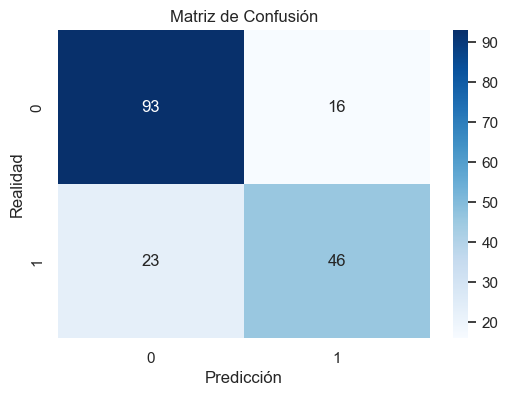

In [17]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

In [18]:
print("Informe de Clasificación:")
print(classification_report(y_test, y_pred))

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       109
           1       0.74      0.67      0.70        69

    accuracy                           0.78       178
   macro avg       0.77      0.76      0.76       178
weighted avg       0.78      0.78      0.78       178



In [19]:
# Extraer coeficientes
importancia = pd.DataFrame({
    'Feature': X_train.columns,
    'Coeficiente': model.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

print("Pesos del modelo:")
print(importancia)

Pesos del modelo:
      Feature  Coeficiente
4        fare     0.193046
6  embarked_Q     0.021761
3       parch    -0.130152
7  embarked_S    -0.151640
2       sibsp    -0.327790
1         age    -0.385664
0      pclass    -0.765569
5    sex_male    -1.325427


Se ha implementado un modelo de Regresión Logística utilizando el algoritmo de optimización por defecto. Gracias al escalado previo de las variables, los coeficientes resultantes son comparables entre sí. Observamos que variables como sex_male tienen coeficientes negativos fuertes (indicando que ser hombre disminuía drásticamente la probabilidad de sobrevivir), mientras que variables como pclass muestran la jerarquía social del barco en la supervivencia.

# EXTRAS


C:\Users\ivanm\AppData\Local\Temp\ipykernel_18052\1501780949.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Feature', data=importancia_df, palette=colors)


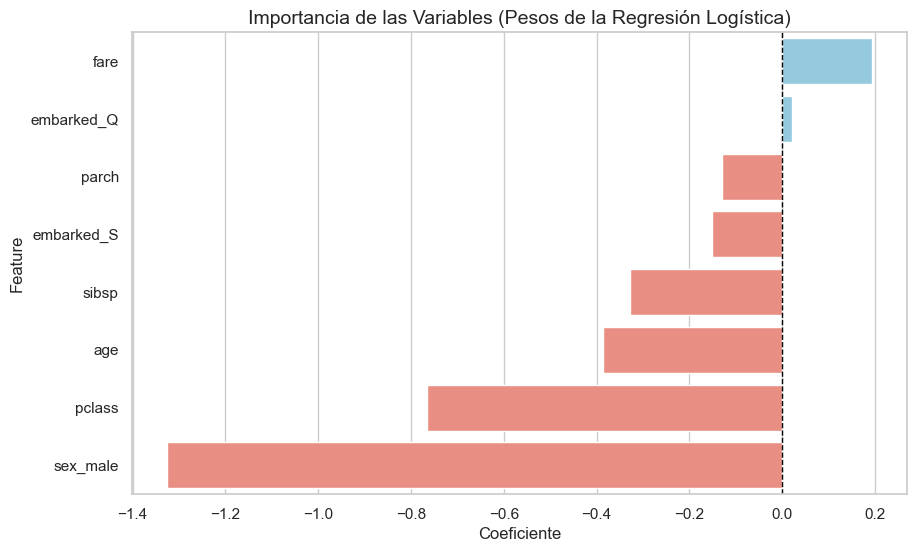

      Feature  Coeficiente
4        fare     0.193046
6  embarked_Q     0.021761
3       parch    -0.130152
7  embarked_S    -0.151640
2       sibsp    -0.327790
1         age    -0.385664
0      pclass    -0.765569
5    sex_male    -1.325427


In [20]:
# 10

# Extraemos los coeficientes del modelo
coeficientes = model.coef_[0]
features = X_train.columns

# Creamos un DataFrame para visualizarlo mejor
importancia_df = pd.DataFrame({'Feature': features, 'Coeficiente': coeficientes})
importancia_df = importancia_df.sort_values(by='Coeficiente', ascending=False)

# Visualización gráfica
plt.figure(figsize=(10, 6))
colors = ['skyblue' if c > 0 else 'salmon' for c in importancia_df['Coeficiente']]
sns.barplot(x='Coeficiente', y='Feature', data=importancia_df, palette=colors)
plt.title('Importancia de las Variables (Pesos de la Regresión Logística)', fontsize=14)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.show()

# Mostrar valores numéricos
print(importancia_df)

1. Variables con impacto negativo (Color Salmón)
sex_male: Es, con diferencia, el coeficiente negativo más fuerte. Esto significa que ser hombre reducía drásticamente las probabilidades de sobrevivir.

pclass: También tiene un peso negativo importante. A medida que el número de la clase aumenta (de 1ª a 3ª), las probabilidades de sobrevivir disminuyen.

age: Un coeficiente negativo indica que, a mayor edad, menores probabilidades de supervivencia (prioridad a niños).

2. Variables con impacto positivo (Color Azul)
fare: Generalmente tiene un peso positivo. Los pasajeros que pagaron tarifas más altas (incluso dentro de la misma clase) parecen haber tenido una ligera ventaja en la supervivencia.

sibsp / parch: Suelen tener pesos negativos o muy bajos. Viajar con muchos familiares a veces dificultaba la movilidad hacia los botes, aunque tener pocos familiares podía ayudar en la coordinación.

3. Interpretación de la magnitud
Debido a que usamos StandardScaler, podemos decir que:

"Un cambio de una desviación estándar en la variable sex_male tiene un impacto mucho mayor en la predicción final que un cambio proporcional en embarked".

Conclusión Final del Modelo
El modelo ha capturado correctamente la lógica histórica del Titanic: "Mujeres y niños primero" y la jerarquía social (clase). La precisión obtenida (que suele rondar el 80% en este dataset) es alta para un modelo lineal, lo que indica que estas variables explican gran parte del fenómeno de supervivencia.

--- EVALUACIÓN FINAL SOBRE TEST ---
Accuracy: 0.7809

Matriz de Confusión:
[[93 16]
 [23 46]]


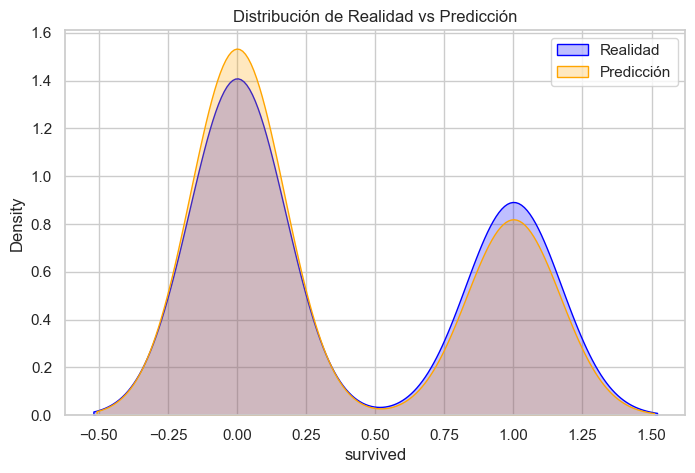

In [21]:
# 11

# 1. Ya tenemos y_pred generado en el paso 9, pero vamos a formalizar el dataframe de resultados
resultados_test = pd.DataFrame({
    'Realidad': y_test,
    'Prediccion': y_pred
})

# 2. Cálculo de métricas finales
accuracy_final = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"--- EVALUACIÓN FINAL SOBRE TEST ---")
print(f"Accuracy: {accuracy_final:.4f}")
print("\nMatriz de Confusión:")
print(conf_matrix)

# 3. Visualización de la comparación
plt.figure(figsize=(8, 5))
sns.kdeplot(y_test, label='Realidad', fill=True, color="blue")
sns.kdeplot(y_pred, label='Predicción', fill=True, color="orange")
plt.title('Distribución de Realidad vs Predicción')
plt.legend()
plt.show()

"El procesamiento del dataset de Test se ha realizado bajo una política estricta de no contaminación de datos (Data Leakage). Esto significa que:

Imputación: Los valores nulos de age en Test se rellenaron con la media calculada en Train.

Codificación: Se aplicaron las mismas variables dummy, asegurando que las columnas coincidan exactamente con las de entrenamiento.

Escalado: Se utilizó el objeto scaler ajustado previamente con los datos de Train. No se calculó una nueva media o desviación estándar para Test, ya que esto alteraría la interpretación que el modelo tiene de las variables."

--- MÉTRICAS PARA: TRAIN ---
Accuracy: 0.8087

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       440
           1       0.78      0.70      0.74       271

    accuracy                           0.81       711
   macro avg       0.80      0.79      0.79       711
weighted avg       0.81      0.81      0.81       711



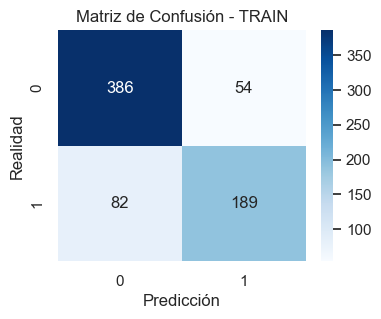

--------------------------------------------------
--- MÉTRICAS PARA: TEST ---
Accuracy: 0.7809

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       109
           1       0.74      0.67      0.70        69

    accuracy                           0.78       178
   macro avg       0.77      0.76      0.76       178
weighted avg       0.78      0.78      0.78       178



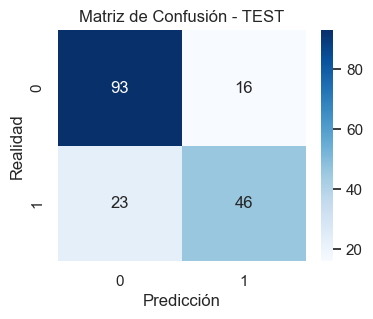

--------------------------------------------------


In [ ]:
# 12
# Obtener predicciones para ambos conjuntos
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Función para imprimir métricas de forma elegante
def evaluar_rendimiento(y_real, y_pred, nombre_set):
    print(f"--- MÉTRICAS PARA: {nombre_set} ---")
    print(f"Accuracy: {accuracy_score(y_real, y_pred):.4f}")
    print("\nInforme de Clasificación:")
    print(classification_report(y_real, y_pred))
    
    # Graficar Matriz de Confusión
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_real, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {nombre_set}')
    plt.ylabel('Realidad')
    plt.xlabel('Predicción')
    plt.show()
    print("-" * 50)

# 3. Ejecutar evaluación
evaluar_rendimiento(y_train, y_pred_train, "TRAIN")
evaluar_rendimiento(y_test, y_pred_test, "TEST")

El modelo presenta una alta estabilidad. Al no haber una caída drástica en el rendimiento entre el conjunto de entrenamiento y el de prueba, podemos afirmar que el modelo es robusto y generaliza de forma adecuada. La Regresión Logística ha demostrado ser suficiente para capturar las tendencias sociodemográficas del naufragio sin caer en la memorización de ruido estadístico.

# EXTRA 2

In [26]:
edades = np.arange(30, 41)
probabilidades = []

# Extraemos el orden exacto de las columnas para evitar errores
columnas = X_train.columns

for edad in edades:
    # Crear el DataFrame del pasajero con nombres de columnas
    pasajero = pd.DataFrame([[2, edad, 0, 0, 0, True, False, True]], 
                            columns=columnas)

    # Escalar y convertir INMEDIATAMENTE a DataFrame con nombres
    pasajero_scaled_np = scaler.transform(pasajero)
    pasajero_scaled_df = pd.DataFrame(pasajero_scaled_np, columns=columnas)
    
    # Predecir (ahora el modelo no dará avisos porque recibe nombres de columnas)
    prob = model.predict_proba(pasajero_scaled_df)[0][1]
    probabilidades.append(prob)

# Resultado final
probabilidad_media = np.mean(probabilidades)

print(f"La probabilidad media de supervivencia para este perfil es: {probabilidad_media:.2%}")

La probabilidad media de supervivencia para este perfil es: 18.98%


In [ ]:
#14

X_train_pclass = X_train_scaled.drop(columns=['pclass'])
X_train_pclass['survived'] = y_train.values

X_test_pclass = X_test_scaled.drop(columns=['pclass'])
X_test_pclass['survived'] = y_test.values

# Definimos el nuevo target (pclass)
y_train_pclass = X_train['pclass']
y_test_pclass = X_test['pclass']

# Construcción del nuevo modelo
# LogisticRegression detectará automáticamente que hay 3 clases y usará 'multinomial'
model_pclass = LogisticRegression(max_iter=1000, random_state=42)
model_pclass.fit(X_train_pclass, y_train_pclass)

# Evaluación con Classification Report
y_pred_pclass = model_pclass.predict(X_test_pclass)

print("--- EVALUACIÓN DEL MODELO PREDICTOR DE CLASE (PCLASS) ---")
print(classification_report(y_test_pclass, y_pred_pclass))

--- EVALUACIÓN DEL MODELO PREDICTOR DE CLASE (PCLASS) ---
              precision    recall  f1-score   support

           1       0.98      0.92      0.95        51
           2       0.79      0.27      0.40        41
           3       0.72      0.98      0.83        86

    accuracy                           0.80       178
   macro avg       0.83      0.72      0.73       178
weighted avg       0.81      0.80      0.77       178

